# Chapter 9 - Probabilistic models for Time Series

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
%load_ext autoreload
%autoreload 2
%load_ext lab_black

: 

## Bayesian Structural Time-Series Modelling

In [2]:
import pandas as pd
from causalimpact import CausalImpact


In [4]:
data = pd.read_csv(
    "https://raw.githubusercontent.com/WillianFuks/tfcausalimpact/master/tests/fixtures/volks_data.csv",
    header=0,
    sep=" ",
    index_col="Date",
    parse_dates=True,
)

data.head()

,VolksWagen,BMW,Allianz
Date,,,
2011-01-02,99.142822,45.039032,60.006882
2011-01-09,100.908623,44.758060,63.032661
2011-01-16,96.084999,42.297653,64.578583
2011-01-23,96.558739,43.360786,66.296272
2011-01-30,94.965218,43.170944,69.962891


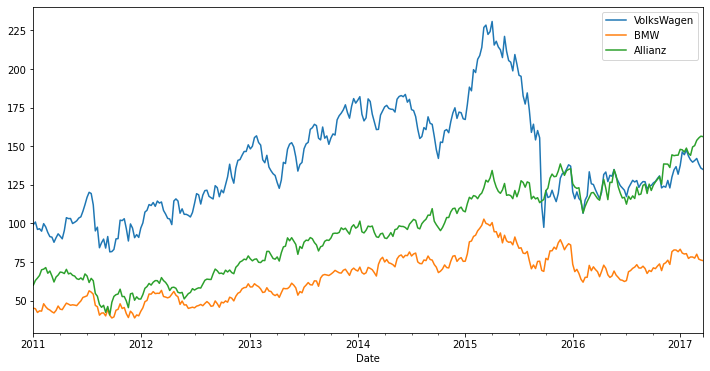

In [9]:
data.plot(figsize=(12, 6))
plt.show()

We can see a sharp drop in the value of Volkswagen shares in late 2015. Let's try to
find out the actual impact of the emission scandal. We can build our model like this:

In [12]:
changepoint_start_date = pd.to_datetime("2015-09-13")
changepoint_end_date = pd.to_datetime("2015-09-20")

pre_period = [str(np.min(data.index.values)), changepoint_start_date]
post_period = [changepoint_end_date, str(np.max(data.index.values))]
pre_period[:5]

['2011-01-02T00:00:00.000000000', Timestamp('2015-09-13 00:00:00')]

In [13]:
causal_impact_volkswagen = CausalImpact(
    data["VolksWagen"],
    pre_period,
    post_period,
    model_args={"nseasons": 52, "fit_method": "vi"},
)

Instructions for updating:
Do not call `graph_parents`.
Instructions for updating:
`MultivariateNormalFullCovariance` is deprecated, use `MultivariateNormalTriL(loc=loc, scale_tril=tf.linalg.cholesky(covariance_matrix))` instead.


2022-07-01 10:04:38.490648: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Instructions for updating:
Please use `StructuralTimeSeries.joint_distribution(observed_time_series).log_prob`
Instructions for updating:
`scale_identity_multiplier` is deprecated; please combine it into `scale_diag` directly instead.
Instructions for updating:
`Predictive distributions returned by`tfp.sts.one_step_predictive` will soon compute per-timestep probabilities (treating timesteps as part of the batch shape) instead of a single probability for an entire series (the current approach, in which timesteps are treated as event shape). Please update your code to pass `timesteps_are_event_shape=False` (this will soon be the default) and to explicitly sum over the per-timestep log probabilities if this is required.


In [15]:
print("\n The model statistics provide us with the causal impact estimate:")
print(causal_impact_volkswagen.summary())


 The model statistics provide us with the causal impact estimate:
Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    126.91             10026.07
Prediction (s.d.)         171.68 (15.58)     13562.94 (1230.75)
95% CI                    [140.22, 201.29]   [11077.42, 15901.89]

Absolute effect (s.d.)    -44.77 (15.58)     -3536.87 (1230.75)
95% CI                    [-74.38, -13.31]   [-5875.82, -1051.36]

Relative effect (s.d.)    -26.08% (9.07%)    -26.08% (9.07%)
95% CI                    [-43.32%, -7.75%]  [-43.32%, -7.75%]

Posterior tail-area probability p: 0.01
Posterior prob. of a causal effect: 99.4%

For more details run the command: print(impact.summary('report'))


As discussed before, the Causal Impact model developed by Google works by fitting
a BSTS model to observed data, which is later used to predict what the results would
be had no intervention happened in a given time period.
The total estimated effect is about 44 points—the stock price would be 44 points
higher if not for the emissions scandal. The impact summary report gives us this
analysis (excerpt):

In [16]:
print(causal_impact_volkswagen.summary("report"))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 126.91. By contrast, in the absence of an
intervention, we would have expected an average response of 171.68.
The 95% interval of this counterfactual prediction is [140.22, 201.29].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is -44.77 with a 95% interval of
[-74.38, -13.31]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 10026.07.
By contrast, had the intervention not taken place, we would have expected
a sum of 13562.94. The 95% interval of this prediction is [11077.42, 15901.89].


The above results are given in terms of absolute numbers. In relative
terms, the 

This gives us a very good idea of what the model estimates.

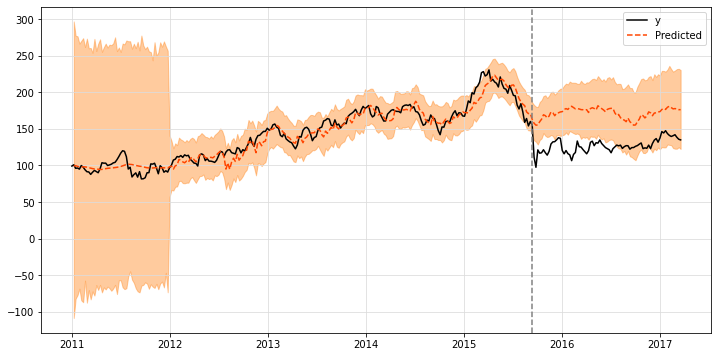

In [21]:
causal_impact_volkswagen.plot(panels=["original"], figsize=(12, 6))

Again, we see the original time-series against the predicted counterfactual value.
The emissions scandal wiped out a massive amount of value from Volkswagen. The
44 points can give us a monetary value of how much cheating emissions tests cost
Volkswagen.